In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb
from moarpalettes import get_palette

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-11', '2023-10-13', '2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [17]:
color_palette = get_palette.Petroff6().to_sn_palette()

In [18]:
color_palette

[(0.3411764705882353, 0.5647058823529412, 0.9882352941176471),
 (0.9725490196078431, 0.611764705882353, 0.12549019607843137),
 (0.8941176470588236, 0.1450980392156863, 0.21176470588235294),
 (0.5882352941176471, 0.2901960784313726, 0.5450980392156862),
 (0.611764705882353, 0.611764705882353, 0.6313725490196078),
 (0.47843137254901963, 0.12941176470588237, 0.8666666666666667)]

# Results from all methods

In [53]:
from matplotlib import colors


stats = [{'med': 16.8, 'q1': -17.0, 'q3': 60.3, 'whislo' : 0, 'whishi': 0},  # ERA5 analogues
        #  {},  # RACMO analogues
         {'med': 10.34, 'q1': 6.38, 'q3': 13.09, 'whislo' : 0, 'whishi': 0},  # PGW past
         {'med': 10.99, 'q1': 3.85, 'q3': 21.13, 'whislo' : 0, 'whishi': 0},  # PGW FUT1
         {'med': 9.55, 'q1': 4.63, 'q3': 16.68, 'whislo' : 0, 'whishi': 0},  # PGW FUT2
         {'med': -25.2, 'q1': -41.6, 'q3': -8.7, 'whislo' : 0, 'whishi': 0},  # FBA IFS, past, 15
         {'med': 46.5, 'q1': 13.3, 'q3': 84.6, 'whislo' : 0, 'whishi': 0},  # FBA IFS, fut, 15
         {'med': 13.6, 'q1': 9.4, 'q3': 17.6, 'whislo' : 0, 'whishi': 0},  # FBA IFS, past, 17
         {'med': 14.4, 'q1': 7.1, 'q3': 21.7, 'whislo' : 0, 'whishi': 0},  # FBA IFS, fut, 17
         {'med': 12.9, 'q1': 12.9, 'q3': 12.9, 'whislo' : 0, 'whishi': 0},  # FBA ACCESS, future
         {'med': -8.7, 'q1': -8.7, 'q3': -8.7, 'whislo' : 0, 'whishi': 0},  # FBA ACCESS, past
        #  {}   # Probabilistic
]

# To help with plotting
g = 1.5  # Space between groups
b = 0.5  # Space within groups
labels = ['ERA5 analogues', 'PGW, past -1.5K', 'PGW, future +1.5K', 'PGW, future +3K', 'FBA IFS, past, init 15th', 'FBA IFS, future, init 15th', 'FBA IFS, past, init 17th', 'FBA IFS, future, init 17th', 'FBA ACCESS, future', 'FBA ACCESS, past']
positions = [b, # ERA5 analogues
             # RACMO analogues
             b+g, 2*b+g, 3*b+g, # PGW
             3*b+2*g, 4*b+2*g, 5*b+2*g, 6*b+2*g, # FBA IFS
             6*b+3*g, 7*b+3*g] # FBA ACCESS
colour_options = [ color_palette[4], color_palette[1]]  #["gray", "darkorange"]
colors = [colour_options[0], # ERA5 analogues
          # RACMO analogues
          colour_options[0], colour_options[1], colour_options[1], # PGW 
          colour_options[0], colour_options[1], colour_options[0], colour_options[1], # FBA IFS
          colour_options[0], colour_options[1], # FBA ACCESS
          ]

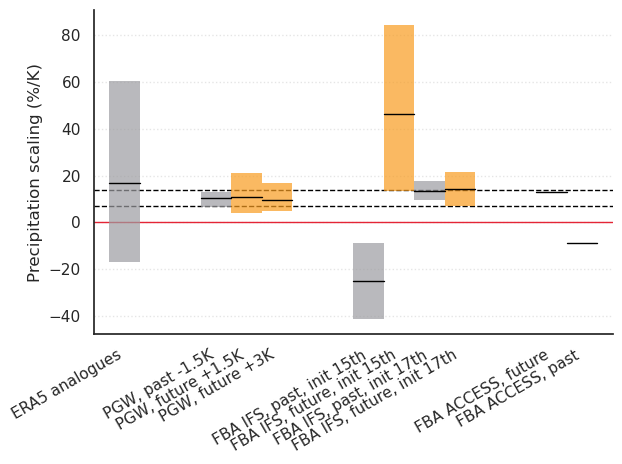

In [54]:
# https://stackoverflow.com/questions/54033076/can-i-generate-a-boxplot-without-a-dataset-and-only-having-the-relevant-values

# Main plot
_, ax = plt.subplots();

# Horizontal line at 7 %/K and 14 %/K and 0
plt.axhline(y=7, color='black', linestyle='--', linewidth=1)
plt.axhline(y=14, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color=color_palette[2], linestyle='-', linewidth=1)

boxplot = ax.bxp(stats, showfliers=False, 
              showcaps=False, 
              whiskerprops={'linestyle': ''}, 
              medianprops={'linestyle': '-', 'color': 'black'}, 
              boxprops={'linestyle': '', 'alpha': 0.7},
              patch_artist=True,
              positions=positions);

# Apply colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Plot settings
plt.ylabel("Precipitation scaling (%/K)")
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=30, ha='right')
sns.despine()
plt.tight_layout()
# Add a faint grid in dotted lines
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.savefig("figures/PAPER3_precip_scaling_boxplot.png", dpi=600, bbox_inches='tight')
plt.savefig("figures/PAPER3_precip_scaling_boxplot.pdf")